# Text Sentiment Analysis using NLP

This script uses NLP algorithms for data pre-processing and Naive Bayes and Logistric regression for training a sentiment analysis model to predict the sentiment of a user entered text.

Importing libraries

In [120]:
import nltk                                
from nltk.corpus import twitter_samples    
import matplotlib.pyplot as plt            
import random
import numpy as np

We shall use the twitter samples dataset of the NLTK library as the training dataset for our sentiment analysis model

In [121]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/shivika/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [122]:
#Getting a list of the positive and negatives tweets from the downloaded dataset
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

## 1. Analysing the dataset

The length of the total dataset is:  10000
The proportion of the positive dataset is:  50.0 %
The proportion of the negative dataset is:  50.0 %
The data structure of the dataset is:  <class 'list'>
The data structure of the elements in the dataset is:  <class 'str'>
A random positive sentiment element:  Deepthroat was a good movie :)) https://t.co/rtz4SsXA0O
A random negative sentiment element:  Goodluck to your pocket "@SwitInno: And I'm moving next week :( https://t.co/HCMO09MhQt…"


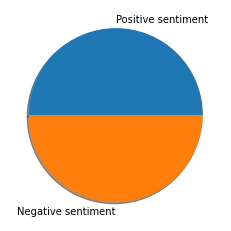

In [123]:
#Printing the length and proportion of the dataset
print("The length of the total dataset is: ", len(pos_tweets) + len(neg_tweets))
print("The proportion of the positive dataset is: ", len(pos_tweets)*100/(len(pos_tweets) + len(neg_tweets)),"%")
print("The proportion of the negative dataset is: ", len(neg_tweets)*100/(len(pos_tweets) + len(neg_tweets)),"%")
sizes = [len(pos_tweets)*100/(len(pos_tweets) + len(neg_tweets)),len(neg_tweets)*100/(len(pos_tweets) + len(neg_tweets)) ]
#Plotting a pie chart for better visualisation
plt.pie(sizes, labels=["Positive sentiment", "Negative sentiment"], shadow=True)

#Visualising the data structures of the dataset
print("The data structure of the dataset is: ", type(pos_tweets))
print("The data structure of the elements in the dataset is: ", type(pos_tweets[0]))

#Visualising an element in the dataset
print("A random positive sentiment element: ", pos_tweets[random.randint(0,len(pos_tweets))])
print("A random negative sentiment element: ", neg_tweets[random.randint(0,len(neg_tweets))])

## 2. Pre-processing the data

The following processes are applied to the dataset in order to pre-process it:
> 1. Tokenize - Split the elements in the dataset into separate words and store them in a list
> 2. Lowercasing all words, removing stopwords and punctuations
        1. This is because some words don't contribute in helping in analysing the sentiment (called stopwords)
        2. Capital letters don't contribute in the same 
> 3. Stemming
        Stemming is the process of grouping words with the same meaning (can have different tenses etc.) together 
        Eg: happy, happiness is stemmed into happi

In [124]:
#Downloading the stopwords dataset from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
#Importing modules for data pre-processing

In [126]:
import re                                  
import string                            

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer       
from nltk.tokenize import TweetTokenizer

In [127]:
#Since our dataset contains tweets, some unnecessary text like retweets "RT", hashtags and links must be removed
def data_removal(tweet):
    #removing "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'^rt[\s]+', '', tweet)
    # removing links
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # removing hashtags
    tweet = re.sub(r'#', '', tweet)
    
    return tweet

In [128]:
# instantiate tokenizer class, while not preserving the class to switch to lowercase letters
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

#instantiate the word stemmer
stemmer = PorterStemmer()

In [129]:
#Importing the english stopwords list from NLTK
stopwords_english = stopwords.words('english')

In [130]:
def process_text(text):
    #Removing unnecessary data
    text = data_removal(text)
    #Tokenising data
    tokenise_text = tokenizer.tokenize(text)
    filtered_text = []
    for word in tokenise_text:
        #Removing stopwords and punctuations
        if (word not in stopwords_english and word not in string.punctuation):
            #Stemming the word and appending the list of filtered text
            stem_word = stemmer.stem(word)
            filtered_text.append(word)
    return filtered_text       

In [131]:
tweets = pos_tweets + neg_tweets
labels = np.append(np.ones((len(pos_tweets))), np.zeros((len(neg_tweets))))

In [132]:
processed_text = []
for tweet in tweets:
    processed_tweet = process_text(tweet)
    processed_text.append(processed_tweet)

In [133]:
print(processed_text[random.randint(0,len(processed_text))])

['next', 'time', 'get', 'fact', 'right', 'making', 'statement', '..', ':-)', 'selamathariraya']


Now, we build a dictionary of the frequency of a word appearing in the positive sentiment and negative sentiment

In [134]:
def create_dict(processed_text, labels):
    freq_dict = {}
    for y, text in zip(labels, processed_text):
        for word in text:
            pair = (word, y)
            freq_dict[pair] = freq_dict.get(pair, 0) + 1
    return freq_dict

In [135]:
create_dict(processed_text, labels)

{('followfriday', 1.0): 25,
 ('top', 1.0): 30,
 ('engaged', 1.0): 7,
 ('members', 1.0): 11,
 ('community', 1.0): 31,
 ('week', 1.0): 71,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('james', 1.0): 7,
 ('odd', 1.0): 1,
 (':/', 1.0): 5,
 ('please', 1.0): 94,
 ('call', 1.0): 26,
 ('contact', 1.0): 6,
 ('centre', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('able', 1.0): 8,
 ('assist', 1.0): 1,
 ('many', 1.0): 33,
 ('thanks', 1.0): 370,
 ('listen', 1.0): 10,
 ('last', 1.0): 44,
 ('night', 1.0): 63,
 ('bleed', 1.0): 2,
 ('amazing', 1.0): 49,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrats', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppy', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verified', 1.0): 1,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profile', 1.0): 2,
 ('15', 1.0): 5,
 ('days', 1.0): 36,
 ('one', 1.0): 125,
 ('irresistible', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 219,
 ('keep', 1.0): 59,

In [136]:
test_pos = pos_tweets[4000:]
train_pos = pos_tweets[:4000]
test_neg = neg_tweets[4000:]
train_neg = neg_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [137]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)))
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)))

In [138]:
processed_text = []
for text in train_x:
    processed_text = process_text(text)
    processed_text.append(list(processed_text))


In [139]:
labels = np.append(np.ones((len(train_pos))), np.zeros((len(train_neg))))
freq_dict = create_dict(processed_text, labels)

### 3. Training the model

#### Applying Logistic Regression

In [140]:
features_X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    x = np.zeros((1, 3)) 
    x[0,0] = 1
    for word in train_x[i]:
        x[0,1] += freq_dict.get((word, 1), 0)
        x[0,2] += freq_dict.get((word, 0), 0)
    features_X[i, :] = x

In [141]:
features_X

array([[  1., 243.,   0.],
       [  1., 256.,   0.],
       [  1., 256.,   0.],
       ...,
       [  1., 118.,   0.],
       [  1., 113.,   0.],
       [  1., 320.,   0.]])

In [142]:
def gradientDescent(x, y, theta, alpha):
    num_points = x.shape[0]
    num_iters = 400
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of h
        h = 1 / (1 + np.exp(-np.dot(x,theta)))
        
        #Calculating the cost function
        J = -1./num_points * (np.dot(y.T, np.log(h)) + np.dot((1-y).T,np.log(1-h)))                                                    

        #Updating the weights theta
        theta = theta - (alpha/num_points) * np.dot(x.T,(h-y))
        
    J = float(J)
    return J, theta

In [143]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
J, theta = gradientDescent(features_X, train_y, np.zeros((3, 1)), 1e-6)

In [144]:
features_X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    x = np.zeros((1, 3)) 
    x[0,0] = 1
    for word in train_x[i]:
        x[0,1] += freq_dict.get((word, 1), 0)
        x[0,2] += freq_dict.get((word, 0), 0)
    features_X_test[i, :] = x

In [145]:
features_X_test

array([[  1., 243.,   0.],
       [  1., 256.,   0.],
       [  1., 256.,   0.],
       ...,
       [  1., 157.,   0.],
       [  1., 242.,   0.],
       [  1.,  25.,   0.]])

In [146]:
print("Predicted Model using logistic regression is:")
print("Cost: ", J)
print("Theta:", theta)

Predicted Model using logistic regression is:
Cost:  0.6912524696318436
Theta: [[-7.17290461e-06]
 [ 6.79815271e-04]
 [ 0.00000000e+00]]


#### Applying the trained model using Logistic Regression

In [147]:
def predict_logistic_regression(text, freq_dict, theta):
    
    x = np.zeros((1, 3)) 
    x[0,0] = 1
    for word in train_x[i]:
        x[0,1] += freq_dict.get((word, 1), 0)
        x[0,2] += freq_dict.get((word, 0), 0)
    y_pred = 1 / (1 + np.exp(-np.dot(x,theta)))
    
    return y_pred

In [151]:
random_text_index = random.randint(0,len(test_y))
processed_test_text = process_text(test_x[random_text_index])
predicted_sentiment = predict_logistic_regression(processed_test_text, freq_dict, theta)
actual_sentiment = test_y[random_text_index]
print(test_x[random_text_index])
print("Processed text: ", processed_test_text)
print("Predicted = ", predicted_sentiment>=0.5)
print("Actual = ", actual_sentiment)

The musical and human genius that is Stromae! :) @stromae @SylvieYonke https://t.co/LzBSWxsQO7 http://t.co/z2zZWgMOm2
Processed text:  ['musical', 'human', 'genius', 'stromae', ':)']
Predicted =  [[ True]]
Actual =  [1.]


#### Finding the accuracy of this model

In [192]:
def test_logistic_regression(test_x, test_y, freq_dict, theta):
    processed_text_test = []
    for text in test_x:
        processed_text = process_text(text)
        processed_text_test.append(processed_text)
    y_pred = []
    
    for text in processed_text_test:
        pred_value = predict_text(text, freq_dict, theta)
        if pred_value >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    correct = 0
    incorrect = 0
    for i in range(len(y_pred)):
        if y_pred[i] == test_y[i]:
            correct += 1
        else:
            incorrect += 1
    accuracy = correct/(correct + incorrect)
        
    return accuracy, correct, incorrect

([<matplotlib.patches.Wedge at 0x12cab16a0>,
 [Text(6.735557395310444e-17, 1.1, 'Correct predictions'),
  Text(-2.0206672185931328e-16, -1.1, 'Incorrect predictions')])

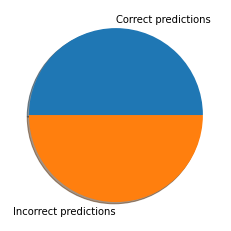

In [195]:
accuracy = test_logistic_regression(test_x, test_y, freq_dict, theta)
accuracy[0]

#Plotting a pie chart for better visualisation
plt.pie(accuracy[1:], labels=["Correct predictions", "Incorrect predictions"], shadow=True)


In [154]:
user_input = input("Enter text: ")
process_user_input = process_text(user_input)
print("Predicting on processed text:", process_user_input)
predicted_sentiment = predict_logistic_regression(process_user_input, freq_dict, theta)
print("Predicted = ", predicted_sentiment>=0.5)

Enter text: Hi! I am happy
Predicting on processed text: ['hi', 'happy']
Predicted =  [[ True]]


#### Applying Naive Bayes

Finding the log prior and log likelihood of words with Laplace Smoothing

In [155]:
def train_naive_bayes(freq_dict, train_x, train_y):
    loglikelihood = {}
    logprior = 0

    vocab = set([pair[0] for pair in freq_dict.keys()])
    V = len(vocab)

    #Calculating N_pos, N_neg, V_pos, V_neg
    #N_i is cumulative frequency of all i sentiment words
    #v_i is number of words with sentiment i
    N_pos = N_neg = V_pos = V_neg = 0
    for pair in freq_dict.keys():
        if pair[1] > 0:
            V_pos += 1
            N_pos += freq_dict[pair]

        else:
            V_neg += 1
            N_neg += freq_dict[pair]

    #Calculating D, the number of documents
    D = len(train_y)

    #Calculating D_pos, the number of positive documents
    D_pos = (len(list(filter(lambda x: x > 0, train_y))))

    #Calculating D_neg, the number of negative documents
    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))

    #Calculating logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        #Getting the positive and negative frequency of the word
        freq_pos = freq_dict.get((word,1), 0)
        freq_neg = freq_dict.get((word,0), 0)

        #Calculating the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        #Calculating the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

    return logprior, loglikelihood

In [160]:
logprior, loglikelihood = train_naive_bayes(freq_dict, train_x, train_y)

In [177]:
def naive_bayes_predict(text, logprior, loglikelihood):

    #Initialising probability
    p = 0

    #Adding probability contribution of logprior
    p += logprior

    for word in text:

        #Checking for existence and then adding the log likelihood of all words
        if word in loglikelihood.keys():
            p += loglikelihood.get(word, 0)

    return p

In [178]:
#Predicting Sentiment of a random testing data element
random_text_index = random.randint(0,len(test_y))
processed_test_text = process_text(test_x[random_text_index])
predicted_sentiment = naive_bayes_predict(processed_test_text, logprior, loglikelihood)
actual_sentiment = test_y[random_text_index]
print(processed_test_text)
print("Predicted = ", predicted_sentiment>=1)
print("Actual = ", actual_sentiment)

['im', 'super', 'duper', 'tired', ':(']
Predicted =  False
Actual =  [0.]


In [199]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    processed_text_test = []
    for text in test_x:
        processed_text = process_text(text)
        processed_text_test.append(processed_text)

    accuracy = 0  
    y_pred = []
    for text in processed_text_test:
        if naive_bayes_predict(text, logprior, loglikelihood) > 0:
            pred = 1
        else:
            pred = 0

        y_pred.append(pred)

    correct = 0
    incorrect = 0
    for i in range(len(y_pred)):
        if y_pred[i] == test_y[i]:
            correct += 1
        else:
            incorrect += 1
    accuracy = correct/(correct + incorrect)
        
    return accuracy, correct, incorrect

([<matplotlib.patches.Wedge at 0x12ce9fbe0>,
 [Text(-0.006911369381001344, 1.0999782875008395, 'Correct predictions'),
  Text(0.006911266393601334, -1.0999782881479236, 'Incorrect predictions')])

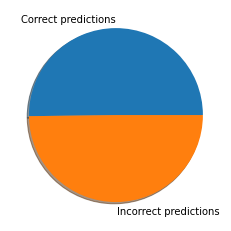

In [201]:
accuracy = test_naive_bayes(test_x, test_y, logprior, loglikelihood)

#Plotting a pie chart for better visualisation
plt.pie(accuracy[1:], labels=["Correct predictions", "Incorrect predictions"], shadow=True)

Thus, we see that the Naive Bayes Method gives a greater accuracy than the Logistic Regression Method.

In [187]:
user_input = input("Enter text: ")
process_user_input = process_text(user_input)
print("Predicting on processed text:", process_user_input)
predicted_sentiment = naive_bayes_predict(process_user_input, logprior, loglikelihood)
print("Predicted = ", predicted_sentiment > 0)

Enter text: Hi! I am sad
Predicting on processed text: ['hi', 'sad']
Predicted =  False


### Conclusion

1. We applied the Logistic regression model and Naive Bayes Model to predict the sentiment of user entered data using NLP algorithms.
2. We showed that the Naive Bayes Method gave better accuracy for our sentiment analysis model over the Logistic regression model.
